<a href="https://colab.research.google.com/github/Anudeep-K2001/fashion-mnist/blob/main/mnist_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_img, train_lbl), (test_img, test_lbl) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_img.shape

(60000, 28, 28)

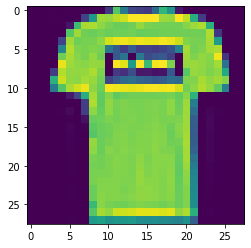

In [ ]:
plt.imshow(train_img[1])

In [ ]:
len(train_lbl)

60000

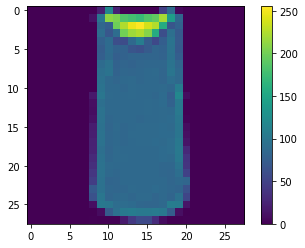

In [ ]:
plt.figure()
plt.imshow(train_img[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_img = train_img/255.0
test_img = test_img/255.0

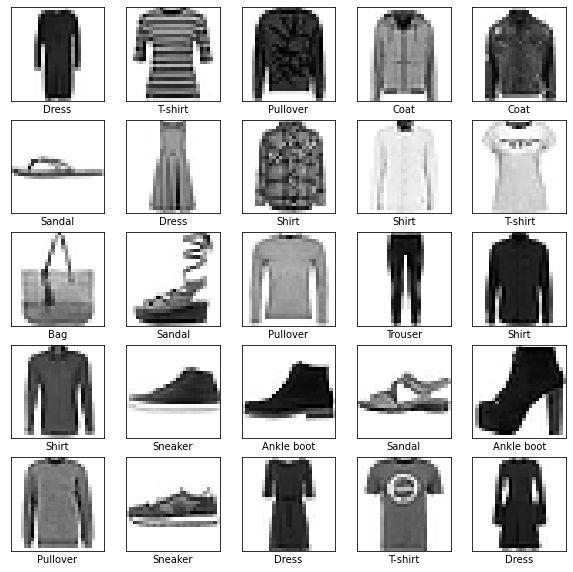

In [ ]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_img[i+25], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_lbl[i+25]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28,28)),
                             tf.keras.layers.Dense(128, activation = 'relu'),
                             tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [ ]:
model.fit(train_img, train_lbl, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6224 - accuracy: 0.7869
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3805 - accuracy: 0.8632
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3442 - accuracy: 0.8766
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3123 - accuracy: 0.8848
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2930 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2821 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9034
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2555 - accuracy: 0.9064
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2474 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.242

In [ ]:
test_loss, test_acc = model.evaluate(test_img, test_lbl, verbose = 2)

print('\nTest accuracy : ', test_acc)

313/313 - 0s - loss: 0.3567 - accuracy: 0.8760

Test accuracy :  0.8759999871253967


In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_img)

In [ ]:
predictions[0]    

array([1.9416691e-06, 5.6926086e-10, 1.7628851e-07, 2.8836300e-10,
       1.3879620e-08, 8.9635105e-05, 6.1049803e-07, 2.0470519e-01,
       1.0076480e-07, 7.9520231e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array),
                                       class_names[true_label]),
             color = color)

In [ ]:
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

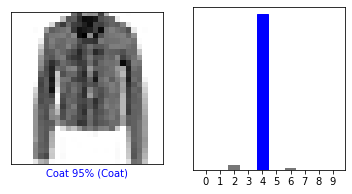

In [ ]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_lbl, test_img)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_lbl)
plt.show()

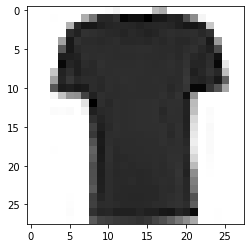

In [ ]:
plt.imshow(train_img[741], cmap = plt.cm.binary)

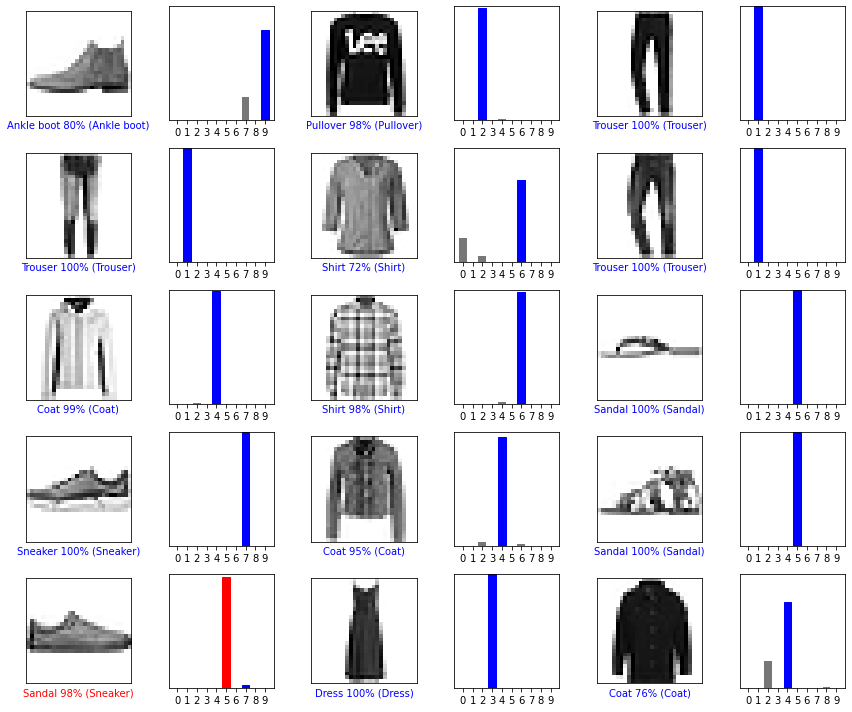

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_lbl, test_img)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_lbl)
plt.tight_layout()
plt.show()